<a href="https://colab.research.google.com/github/MAboElFottouh/Predictive-Modelling-Using-Social-Profile-in-Online-P2P-Lending-Market-Project-TCS56EA/blob/main/model_team_B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [52]:
import pandas  as pd #Data manipulation
import numpy as np #Data manipulation
import matplotlib.pyplot as plt # Visualization
import seaborn as sns #Visualization

In [53]:
data = pd.read_csv("/content/drive/MyDrive/prosperLoanData.csv")

In [54]:
print('\nNumber of rows and columns in the data set: ',data.shape)
#Lets look into top few rows and columns in the dataset
data.head()


Number of rows and columns in the data set:  (113937, 81)


,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [55]:
data.info() #show data info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [56]:
data.duplicated().sum() #check duplicated row

0

In [57]:
#split null object and numerical
def nAn():
  nan_name = []
  pans = []
  typeD = []
  for i in range(data.shape[1]):
    if (data.isna().sum()[i] != 0 ): #if have null only
      nan_name.append(data.columns[i])
      pans.append(data.isna().sum()[i] / data.shape[0] * 100)
      typeD.append(data[data.columns[i]].dtypes)
      print(data.isna().sum()[i],'\t' ,data.columns[i],'\t',data.isna().sum()[i] / data.shape[0] * 100 , '%')
  return nan_name ,pans , typeD

In [58]:
n , p , d= nAn();

84984 	 CreditGrade 	 74.58858843044841 %
58848 	 ClosedDate 	 51.64959582927408 %
25 	 BorrowerAPR 	 0.02194195037608503 %
29084 	 EstimatedEffectiveYield 	 25.52638738952228 %
29084 	 EstimatedLoss 	 25.52638738952228 %
29084 	 EstimatedReturn 	 25.52638738952228 %
29084 	 ProsperRating (numeric) 	 25.52638738952228 %
29084 	 ProsperRating (Alpha) 	 25.52638738952228 %
29084 	 ProsperScore 	 25.52638738952228 %
5515 	 BorrowerState 	 4.840394252964358 %
3588 	 Occupation 	 3.149108717975723 %
2255 	 EmploymentStatus 	 1.9791639239228696 %
7625 	 EmploymentStatusDuration 	 6.692294864705935 %
100596 	 GroupKey 	 88.29089760130599 %
591 	 CreditScoreRangeLower 	 0.5187077068906502 %
591 	 CreditScoreRangeUpper 	 0.5187077068906502 %
697 	 FirstRecordedCreditLine 	 0.6117415764852506 %
7604 	 CurrentCreditLines 	 6.673863626390022 %
7604 	 OpenCreditLines 	 6.673863626390022 %
697 	 TotalCreditLinespast7years 	 0.6117415764852506 %
697 	 InquiriesLast6Months 	 0.6117415764852506 %
1159 

In [59]:
for i in range(len(n)) :
  if p[i] > 50 :
    data.drop(n[i],axis=1, inplace= True)

In [60]:
n , p ,d= nAn()

25 	 BorrowerAPR 	 0.02194195037608503 %
29084 	 EstimatedEffectiveYield 	 25.52638738952228 %
29084 	 EstimatedLoss 	 25.52638738952228 %
29084 	 EstimatedReturn 	 25.52638738952228 %
29084 	 ProsperRating (numeric) 	 25.52638738952228 %
29084 	 ProsperRating (Alpha) 	 25.52638738952228 %
29084 	 ProsperScore 	 25.52638738952228 %
5515 	 BorrowerState 	 4.840394252964358 %
3588 	 Occupation 	 3.149108717975723 %
2255 	 EmploymentStatus 	 1.9791639239228696 %
7625 	 EmploymentStatusDuration 	 6.692294864705935 %
591 	 CreditScoreRangeLower 	 0.5187077068906502 %
591 	 CreditScoreRangeUpper 	 0.5187077068906502 %
697 	 FirstRecordedCreditLine 	 0.6117415764852506 %
7604 	 CurrentCreditLines 	 6.673863626390022 %
7604 	 OpenCreditLines 	 6.673863626390022 %
697 	 TotalCreditLinespast7years 	 0.6117415764852506 %
697 	 InquiriesLast6Months 	 0.6117415764852506 %
1159 	 TotalInquiries 	 1.0172288194353019 %
697 	 CurrentDelinquencies 	 0.6117415764852506 %
7622 	 AmountDelinquent 	 6.68966

In [61]:
for i in range(len(n)) :
  if d[i] == 'object' :
    data[n[i]].replace(np.nan,str(data[n[i]].mode()),inplace=True) 
  elif d[i] == 'int64' or d[i] == 'float64' :
    data[n[i]].replace(np.nan,float(data[n[i]].mean()),inplace=True) 
    data[n[i]].astype('float64')

In [62]:
n , p ,d= nAn()

now donot have null

In [63]:
data.drop('ProsperRating (numeric)',axis=1, inplace= True) #same data in ProsperRating (Alpha)

# z score to get outlier 

In [65]:
def z_score(data,column,col_mean,col_std):
    outliers=[]
    ther=3
    for i in data :
        z=(i-col_mean)/col_std
        if np.abs(z)>3 :
            outliers.append(i)
            
    print("outliers in column ",column," is ",outliers)
            

In [66]:
def ty():
  float_D = []
  object_bool = []
  for i in data.columns:
    if data[i].dtypes == 'float64' or data[i].dtypes == 'int64':
      float_D.append(i)
    else :
      object_bool.append(i)
      

  return float_D ,object_bool


In [67]:
float_D ,object_bool = ty()

In [68]:
data_mean=[]
data_std=[]

for i in float_D:
  data_mean.append(data[i].mean())
  data_std.append(data[i].std())


In [ ]:


for i in range(len(float_D)):
    if i =='BorrowerRate':
        continue 
    z_score(data[float_D[i]],float_D[i],data_mean[i],data_std[i])


# replace outlier to null

In [70]:
# Mean-3*std ,mean+3*std 
def treat_outlier(data,col_mean,col_std):
    outliers=[]
    ther=3
    for i in range(len(data)) :
        z=(data[i]-col_mean)/col_std
        if np.abs(z)>3 :
            data[i]=np.nan

In [71]:

for i in range(len(float_D)):
    if i=='BorrowerRate':
        continue 
    treat_outlier(data[float_D[i]],data_mean[i],data_std[i])




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [72]:
for i in range(len(float_D)):
    if i =='BorrowerRate':
        continue 
    z_score(data[float_D[i]],float_D[i],data_mean[i],data_std[i])

outliers in column  ListingNumber  is  []
outliers in column  Term  is  []
outliers in column  BorrowerAPR  is  []
outliers in column  BorrowerRate  is  []
outliers in column  LenderYield  is  []
outliers in column  EstimatedEffectiveYield  is  []
outliers in column  EstimatedLoss  is  []
outliers in column  EstimatedReturn  is  []
outliers in column  ProsperScore  is  []
outliers in column  ListingCategory (numeric)  is  []
outliers in column  EmploymentStatusDuration  is  []
outliers in column  CreditScoreRangeLower  is  []
outliers in column  CreditScoreRangeUpper  is  []
outliers in column  CurrentCreditLines  is  []
outliers in column  OpenCreditLines  is  []
outliers in column  TotalCreditLinespast7years  is  []
outliers in column  OpenRevolvingAccounts  is  []
outliers in column  OpenRevolvingMonthlyPayment  is  []
outliers in column  InquiriesLast6Months  is  []
outliers in column  TotalInquiries  is  []
outliers in column  CurrentDelinquencies  is  []
outliers in column  Amoun

now donot have outlier

# convert time 

In [73]:
data['FirstRecordedCreditLine_date'] = pd.to_datetime(data['FirstRecordedCreditLine'], errors='coerce')
data['LoanOriginationDate_date'] = pd.to_datetime(data['LoanOriginationDate'], errors='coerce')
data['ListingCreationDate_date'] = pd.to_datetime(data['ListingCreationDate'], errors='coerce')
data['DateCreditPulled_date'] = pd.to_datetime(data['DateCreditPulled'], errors='coerce')


In [74]:
data['FirstRecordedCreditLine_date_day'] = data['FirstRecordedCreditLine_date'].dt.day
data['FirstRecordedCreditLine_date_month'] = data['FirstRecordedCreditLine_date'].dt.month
data['FirstRecordedCreditLine_date_year'] = data['FirstRecordedCreditLine_date'].dt.year

In [75]:
data['LoanOriginationDate_date_day'] = data['LoanOriginationDate_date'].dt.day
data['LoanOriginationDate_date_month'] = data['LoanOriginationDate_date'].dt.month
data['LoanOriginationDate_date_year'] = data['LoanOriginationDate_date'].dt.year

In [76]:
data['ListingCreationDate_date_day'] = data['ListingCreationDate_date'].dt.day
data['ListingCreationDate_date_month'] = data['ListingCreationDate_date'].dt.month
data['ListingCreationDate_date_year'] = data['ListingCreationDate_date'].dt.year

In [77]:
data['DateCreditPulled_date_day'] = data['DateCreditPulled_date'].dt.day
data['DateCreditPulled_date_month'] = data['DateCreditPulled_date'].dt.month
data['DateCreditPulled_date_year'] = data['DateCreditPulled_date'].dt.year

In [78]:
data.drop('FirstRecordedCreditLine',axis=1, inplace= True)
data.drop('LoanOriginationDate',axis=1, inplace= True)
data.drop('ListingCreationDate',axis=1, inplace= True)
data.drop('DateCreditPulled',axis=1, inplace= True)

data.drop('FirstRecordedCreditLine_date',axis=1, inplace= True)
data.drop('LoanOriginationDate_date',axis=1, inplace= True)
data.drop('ListingCreationDate_date',axis=1, inplace= True)
data.drop('DateCreditPulled_date',axis=1, inplace= True)

In [79]:
data['FirstRecordedCreditLine_date_day'] = data['FirstRecordedCreditLine_date_day'].astype({"FirstRecordedCreditLine_date_day": str}, errors='raise') 
data['FirstRecordedCreditLine_date_month'] = data['FirstRecordedCreditLine_date_month'].astype({"FirstRecordedCreditLine_date_month": str}, errors='raise') 
data['FirstRecordedCreditLine_date_year'] = data['FirstRecordedCreditLine_date_year'].astype({"FirstRecordedCreditLine_date_year": str}, errors='raise') 


In [80]:
data['LoanOriginationDate_date_day'] = data['LoanOriginationDate_date_day'].astype({"LoanOriginationDate_date_day": str}, errors='raise') 
data['LoanOriginationDate_date_month'] = data['LoanOriginationDate_date_month'].astype({"LoanOriginationDate_date_month": str}, errors='raise') 
data['LoanOriginationDate_date_year'] = data['LoanOriginationDate_date_year'].astype({"LoanOriginationDate_date_year": str}, errors='raise') 


In [81]:
data['ListingCreationDate_date_day'] = data['ListingCreationDate_date_day'].astype({"ListingCreationDate_date_day": str}, errors='raise') 
data['ListingCreationDate_date_month'] = data['ListingCreationDate_date_month'].astype({"ListingCreationDate_date_month": str}, errors='raise') 
data['ListingCreationDate_date_year'] = data['ListingCreationDate_date_year'].astype({"ListingCreationDate_date_year": str}, errors='raise') 


In [82]:
data['DateCreditPulled_date_day'] = data['DateCreditPulled_date_day'].astype({"DateCreditPulled_date_day": str}, errors='raise') 
data['DateCreditPulled_date_month'] = data['DateCreditPulled_date_month'].astype({"DateCreditPulled_date_month": str}, errors='raise') 
data['DateCreditPulled_date_year'] = data['DateCreditPulled_date_year'].astype({"DateCreditPulled_date_year": str}, errors='raise') 


In [83]:
n , p ,d= nAn()

4 	 BorrowerAPR 	 0.0035107120601736044 %
6 	 BorrowerRate 	 0.005266068090260407 %
6 	 LenderYield 	 0.005266068090260407 %
170 	 EstimatedEffectiveYield 	 0.1492052625573782 %
446 	 EstimatedLoss 	 0.39144439470935694 %
915 	 EstimatedReturn 	 0.803075383764712 %
4302 	 ListingCategory (numeric) 	 3.775770820716712 %
2078 	 EmploymentStatusDuration 	 1.8238149152601877 %
662 	 CreditScoreRangeLower 	 0.5810228459587315 %
662 	 CreditScoreRangeUpper 	 0.5810228459587315 %
1166 	 CurrentCreditLines 	 1.0233725655406058 %
1476 	 OpenCreditLines 	 1.2954527502040603 %
998 	 TotalCreditLinespast7years 	 0.8759226590133143 %
1621 	 OpenRevolvingAccounts 	 1.4227160623853534 %
2132 	 OpenRevolvingMonthlyPayment 	 1.8712095280725312 %
2204 	 InquiriesLast6Months 	 1.9344023451556562 %
2053 	 TotalInquiries 	 1.8018729648841028 %
2342 	 CurrentDelinquencies 	 2.0555219112316454 %
1157 	 AmountDelinquent 	 1.0154734634052152 %
2880 	 DelinquenciesLast7Years 	 2.5277126833249954 %
1592 	 Public

# replace null after outlier

In [84]:

for i in range(len(n)) :
  if d[i] == 'object' :
    data[n[i]].replace(np.nan,str(data[n[i]].mode()),inplace=True) 
  elif d[i] == 'int64' or d[i] == 'float64' :
    data[n[i]].replace(np.nan,float(data[n[i]].mean()),inplace=True) 
    data[n[i]].astype('float64')


In [85]:
j=0
for i in data.columns:
  print(data.isna().sum()[j],data[i].dtypes,i)
  j+=1

0 object ListingKey
0 int64 ListingNumber
0 int64 Term
0 object LoanStatus
0 float64 BorrowerAPR
0 float64 BorrowerRate
0 float64 LenderYield
0 float64 EstimatedEffectiveYield
0 float64 EstimatedLoss
0 float64 EstimatedReturn
0 object ProsperRating (Alpha)
0 float64 ProsperScore
0 float64 ListingCategory (numeric)
0 object BorrowerState
0 object Occupation
0 object EmploymentStatus
0 float64 EmploymentStatusDuration
0 bool IsBorrowerHomeowner
0 bool CurrentlyInGroup
0 float64 CreditScoreRangeLower
0 float64 CreditScoreRangeUpper
0 float64 CurrentCreditLines
0 float64 OpenCreditLines
0 float64 TotalCreditLinespast7years
0 float64 OpenRevolvingAccounts
0 float64 OpenRevolvingMonthlyPayment
0 float64 InquiriesLast6Months
0 float64 TotalInquiries
0 float64 CurrentDelinquencies
0 float64 AmountDelinquent
0 float64 DelinquenciesLast7Years
0 float64 PublicRecordsLast10Years
0 float64 PublicRecordsLast12Months
0 float64 RevolvingCreditBalance
0 float64 BankcardUtilization
0 float64 AvailableBa

In [86]:
data['FirstRecordedCreditLine_date_day']=data['FirstRecordedCreditLine_date_day'].astype('float64')
data['FirstRecordedCreditLine_date_month']=data['FirstRecordedCreditLine_date_month'].astype('float64')
data['FirstRecordedCreditLine_date_year']=data['FirstRecordedCreditLine_date_year'].astype('float64')
data['LoanOriginationDate_date_day']=data['LoanOriginationDate_date_day'].astype('float64')
data['LoanOriginationDate_date_month']=data['LoanOriginationDate_date_month'].astype('float64')
data['LoanOriginationDate_date_year']=data['LoanOriginationDate_date_year'].astype('float64')
data['ListingCreationDate_date_day']=data['ListingCreationDate_date_day'].astype('float64')
data['ListingCreationDate_date_month']=data['ListingCreationDate_date_month'].astype('float64')
data['ListingCreationDate_date_year']=data['ListingCreationDate_date_year'].astype('float64')
data['DateCreditPulled_date_day']=data['DateCreditPulled_date_day'].astype('float64')
data['DateCreditPulled_date_month']=data['DateCreditPulled_date_month'].astype('float64')
data['DateCreditPulled_date_year']=data['DateCreditPulled_date_year'].astype('float64')



In [87]:
data['FirstRecordedCreditLine_date_day'].replace(np.nan,float(data['FirstRecordedCreditLine_date_day'].mode()),inplace=True) 
data['FirstRecordedCreditLine_date_month'].replace(np.nan,float(data['FirstRecordedCreditLine_date_month'].mode()),inplace=True) 
data['FirstRecordedCreditLine_date_year'].replace(np.nan,float(data['FirstRecordedCreditLine_date_year'].mode()),inplace=True) 

In [88]:
float_D ,object_bool = ty()

In [89]:
#columns unique  
for i in object_bool :
  if data[i].nunique() > 90000:
    print(data[i].nunique() , '\t' , i)
    data.drop(i,axis=1, inplace= True)    

113066 	 ListingKey
113066 	 LoanKey
90831 	 MemberKey


In [90]:
float_D ,object_bool = ty()

In [91]:

for i in object_bool :
  print(data[i].nunique() , '\t' , i)  

12 	 LoanStatus
8 	 ProsperRating (Alpha)
52 	 BorrowerState
68 	 Occupation
9 	 EmploymentStatus
2 	 IsBorrowerHomeowner
2 	 CurrentlyInGroup
8 	 IncomeRange
2 	 IncomeVerifiable
33 	 LoanOriginationQuarter


In [92]:
x = data['LoanStatus'].unique()

In [93]:
for i in x:
  if i == 'Completed':
    data['LoanStatus'].replace(i,int(1),inplace=True)
#  elif i == 'Current':
#    data['LoanStatus'].replace(i,int(2),inplace=True)
  else :
    data['LoanStatus'].replace(i,0,inplace=True)

In [95]:
data['LoanStatus'].dtype

dtype('int64')

In [97]:
float_D ,object_bool = ty()

# encoder OneHotEncoder

In [98]:
from sklearn.preprocessing import OneHotEncoder
# creating one hot encoder object 
onehotencoder = OneHotEncoder()
for j in range(len(object_bool)):
  #reshape the 1-D country array to 2-D as fit_transform expects 2-D and finally fit the object 
  X = onehotencoder.fit_transform(data[object_bool[j]].values.reshape(-1,1)).toarray()
  #To add this back into the original dataframe 
  dfOneHot = pd.DataFrame(X, columns = [object_bool[j]+str(int(i)) for i in range(data[object_bool[j]].nunique())]) 
  data = pd.concat([data, dfOneHot], axis=1)
  #droping the country column 
  data= data.drop([object_bool[j]], axis=1) 
  #printing to verify 
  print(data.head())

   ListingNumber  Term  LoanStatus  BorrowerAPR  BorrowerRate  LenderYield  \
0         193129    36           1      0.16516        0.1580       0.1380   
1        1209647    36           0      0.12016        0.0920       0.0820   
2          81716    36           1      0.28269        0.2750       0.2400   
3         658116    36           0      0.12528        0.0974       0.0874   
4         909464    36           0      0.24614        0.2085       0.1985   

   EstimatedEffectiveYield  EstimatedLoss  EstimatedReturn  ProsperScore  ...  \
0                 0.168661       0.080306         0.096068      5.950067  ...   
1                 0.079600       0.024900         0.054700      7.000000  ...   
2                 0.168661       0.080306         0.096068      5.950067  ...   
3                 0.084900       0.024900         0.060000      9.000000  ...   
4                 0.183160       0.092500         0.090660      4.000000  ...   

   DateCreditPulled_date_month DateCreditPul

In [99]:
float_D ,object_bool = ty()

for i in object_bool :
  print(data[i].nunique() , '\t' , i)  

no object columns

In [101]:
data.shape

(113937, 248)

In [102]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Columns: 248 entries, ListingNumber to LoanOriginationQuarter32
dtypes: float64(243), int64(5)
memory usage: 215.6 MB


In [103]:
data['Target'] = data['LoanStatus']
data.drop('LoanStatus',axis=1, inplace= True) #rename  LoanStatus to target 

In [ ]:
data.drop('ListingNumber',axis=1, inplace= True) #unique value like id

In [113]:

data.drop('LoanNumber',axis=1, inplace= True)  #unique value like id


# Correlation

In [114]:
corr=data.corr()


In [115]:
corr

,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperScore,ListingCategory (numeric),EmploymentStatusDuration,...,LoanOriginationQuarter24,LoanOriginationQuarter25,LoanOriginationQuarter26,LoanOriginationQuarter27,LoanOriginationQuarter28,LoanOriginationQuarter29,LoanOriginationQuarter30,LoanOriginationQuarter31,LoanOriginationQuarter32,Target
Term,1.000000,-0.011130,0.020183,0.020653,0.052893,-0.099385,0.157068,0.027862,-0.022922,0.082892,...,-0.006432,-0.067936,-0.070617,-0.031701,-0.052530,-0.052149,-0.080524,0.055308,0.122324,-0.286212
BorrowerAPR,-0.011130,1.000000,0.989508,0.989015,0.783230,0.821902,0.702284,-0.573682,0.138687,-0.008734,...,0.000002,-0.028036,-0.073464,0.004918,0.003456,0.085399,0.100159,0.062705,-0.066780,-0.088517
BorrowerRate,0.020183,0.989508,1.000000,0.999211,0.785265,0.820838,0.724194,-0.559510,0.110783,-0.017732,...,-0.018404,0.002519,-0.044162,0.007213,0.009996,0.080685,0.087711,0.050401,-0.092882,-0.060008
LenderYield,0.020653,0.989015,0.999211,1.000000,0.788508,0.824167,0.727123,-0.561821,0.112604,-0.016696,...,-0.018584,0.003897,-0.041498,0.007248,0.010027,0.081023,0.088226,0.050775,-0.092937,-0.058009
EstimatedEffectiveYield,0.052893,0.783230,0.785265,0.788508,1.000000,0.882873,0.816400,-0.650061,0.090301,-0.021985,...,-0.000079,-0.000833,-0.000866,-0.000389,-0.106280,-0.089368,0.134627,0.065131,-0.102077,-0.029668
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LoanOriginationQuarter29,-0.052149,0.085399,0.080685,0.081023,-0.089368,0.060690,0.064297,0.029527,0.043016,-0.008577,...,-0.001659,-0.017517,-0.018209,-0.008174,-0.013545,1.000000,-0.022507,-0.023990,-0.045483,0.119757
LoanOriginationQuarter30,-0.080524,0.100159,0.087711,0.088226,0.134627,0.073687,0.155820,-0.009062,0.059244,-0.005286,...,-0.002621,-0.027681,-0.028774,-0.012917,-0.021404,-0.022507,1.000000,-0.037909,-0.071872,0.036926
LoanOriginationQuarter31,0.055308,0.062705,0.050401,0.050775,0.065131,0.031298,0.053435,0.038673,0.057784,0.011727,...,-0.002793,-0.029505,-0.030670,-0.013768,-0.022814,-0.023990,-0.037909,1.000000,-0.076608,-0.044944
LoanOriginationQuarter32,0.122324,-0.066780,-0.092882,-0.092937,-0.102077,-0.076587,-0.223027,-0.032954,-0.036691,0.055201,...,-0.005296,-0.055940,-0.058148,-0.026103,-0.043255,-0.045483,-0.071872,-0.076608,1.000000,-0.248185


# Feature Selection

In [116]:
columns=np.full(corr.shape[0],False,dtype=bool)
columns

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [117]:
for i in range(0,corr.shape[0]):
    
    if abs(corr.iloc[-1,i]) > 0.4:
        print(corr.iloc[-1,i])
        columns[i]=True

0.5108495215243296
0.45369823778056273
0.5483876378803637
-0.5081321472580486
-0.5086453639650773
-0.5073186252939289
1.0


In [118]:
selected_columns=data.columns[columns]
selected_columns

Index(['LoanMonthsSinceOrigination', 'LP_CustomerPayments',
       'LP_CustomerPrincipalPayments', 'LoanOriginationDate_date_year',
       'ListingCreationDate_date_year', 'DateCreditPulled_date_year',
       'Target'],
      dtype='object')

In [119]:
high_features=data[selected_columns]
high_features.head()

,LoanMonthsSinceOrigination,LP_CustomerPayments,LP_CustomerPrincipalPayments,LoanOriginationDate_date_year,ListingCreationDate_date_year,DateCreditPulled_date_year,Target
0,78,11396.14,9425.00,2007.0,2007.0,2007.0,1
1,0,0.00,0.00,2014.0,2014.0,2014.0,0
2,86,4186.63,3001.00,2007.0,2007.0,2007.0,1
3,16,5143.20,4091.09,2012.0,2012.0,2012.0,0
4,6,2819.85,1563.22,2013.0,2013.0,2013.0,0


In [120]:
data_copy=data.drop(selected_columns,axis=1)


In [121]:
data_copy.head()


,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperScore,ListingCategory (numeric),EmploymentStatusDuration,...,LoanOriginationQuarter23,LoanOriginationQuarter24,LoanOriginationQuarter25,LoanOriginationQuarter26,LoanOriginationQuarter27,LoanOriginationQuarter28,LoanOriginationQuarter29,LoanOriginationQuarter30,LoanOriginationQuarter31,LoanOriginationQuarter32
0,36,0.16516,0.1580,0.1380,0.168661,0.080306,0.096068,5.950067,0.000000,2.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,36,0.12016,0.0920,0.0820,0.079600,0.024900,0.054700,7.000000,2.000000,44.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,36,0.28269,0.2750,0.2400,0.168661,0.080306,0.096068,5.950067,0.000000,96.071582,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,36,0.12528,0.0974,0.0874,0.084900,0.024900,0.060000,9.000000,2.203357,113.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,36,0.24614,0.2085,0.1985,0.183160,0.092500,0.090660,4.000000,2.000000,44.000000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Feature extraction

PCA



In [122]:
X=data_copy.values
X.shape

(113937, 239)

Normalizer

In [123]:
from sklearn.preprocessing import Normalizer 
nor=Normalizer()
X=nor.fit_transform(X)

In [128]:
from sklearn.decomposition import PCA
pca=PCA(n_components=4)
pca_components=pca.fit_transform(X)

In [129]:
variance_eplained=pca.explained_variance_ratio_
comulative_variance=np.cumsum(variance_eplained)

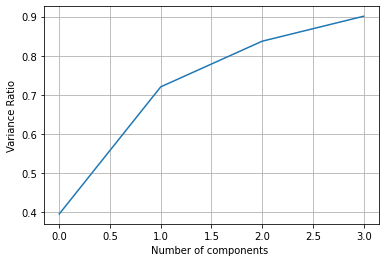

In [130]:
plt.figure(figsize=(6,4))
plt.clf()
plt.plot(comulative_variance)
plt.xlabel('Number of components ')
plt.ylabel("Variance Ratio")
plt.grid()
plt.show()

In [131]:
pca.explained_variance_ratio_

array([0.39630877, 0.32434461, 0.11646342, 0.06369062])

In [132]:
pca_data=pd.DataFrame(data=pca_components)


In [133]:
new_data=pd.concat([high_features,pca_data],axis=1)
print(new_data.shape)
new_data.head()

(113937, 11)


,LoanMonthsSinceOrigination,LP_CustomerPayments,LP_CustomerPrincipalPayments,LoanOriginationDate_date_year,ListingCreationDate_date_year,DateCreditPulled_date_year,Target,0,1,2,3
0,78,11396.14,9425.00,2007.0,2007.0,2007.0,1,0.692042,-0.078645,-0.244891,0.087999
1,0,0.00,0.00,2014.0,2014.0,2014.0,0,0.293597,0.316420,-0.096080,-0.116877
2,86,4186.63,3001.00,2007.0,2007.0,2007.0,1,-0.460281,0.153677,0.014556,0.041206
3,16,5143.20,4091.09,2012.0,2012.0,2012.0,0,0.175529,0.747110,0.048344,0.235638
4,6,2819.85,1563.22,2013.0,2013.0,2013.0,0,0.431226,-0.296491,-0.122762,-0.097962


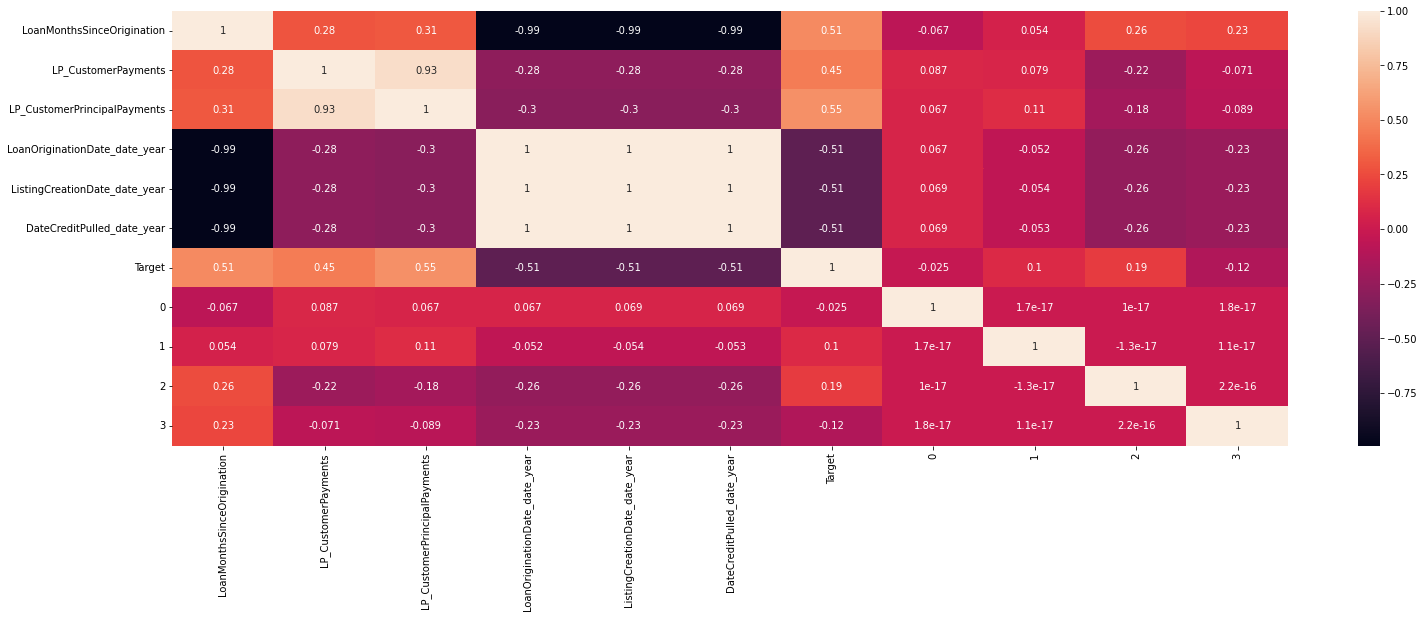

In [134]:
plt.figure(figsize=(25,8))
sns.heatmap(new_data.corr(),annot=True)

# split data to train and test 

In [135]:
from sklearn.model_selection import train_test_split
X = new_data.drop('Target',axis=1) # Independet variable
y = new_data['Target'] # dependent variable
train_X,test_X,train_y,test_y = train_test_split(X,y)

# model without Balanc data


In [136]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(n_jobs=10,max_iter=1200,C=200,intercept_scaling=10).fit(train_X,train_y)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [137]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
y_pred=clf.predict(train_X)


print("Accuracy :" ,accuracy_score(train_y,y_pred))
print("Recall : ",recall_score(train_y,y_pred))
print("precsiion : ",precision_score(train_y,y_pred))
print("F1 score :",f1_score(train_y,y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


Accuracy : 0.8620278050835557
Recall :  0.7559511343804538
precsiion :  0.8186422739643181
F1 score : 0.786048706130004


In [138]:
#On test Set 
y_pred=clf.predict(test_X)

print("Accuracy :" ,accuracy_score(test_y,y_pred))
print("Recall : ",recall_score(test_y,y_pred))
print("precsiion : ",precision_score(test_y,y_pred))
print("F1 score :",f1_score(test_y,y_pred))

Accuracy : 0.8585571353343865
Recall :  0.7444821731748726
precsiion :  0.8123190922774112
F1 score : 0.7769226510160013


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


# Check Balancing


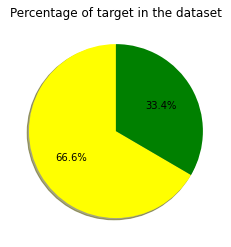

In [145]:
from matplotlib import pyplot as plt
sizes = data['Target'].value_counts(sort = True)
colors = ["yellow","green"] 
plt.pie(sizes, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90,)
plt.title('Percentage of target in the dataset')
plt.show()

In [146]:
data['Target'].value_counts()

0    75863
1    38074
Name: Target, dtype: int64

In [147]:
from sklearn.model_selection import train_test_split

X = data.drop('Target', axis=1)
y = data['Target']

In [148]:
# example of random undersampling to balance the class distribution
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import RandomUnderSampler

print(Counter(y))
# define undersample strategy
undersample = RandomUnderSampler(sampling_strategy='majority')
# fit and apply the transform
X_over, y_over = undersample.fit_resample(X, y)
# summarize class distribution
print(Counter(y_over))

Counter({0: 75863, 1: 38074})
Counter({0: 38074, 1: 38074})


In [151]:
train_X,test_X,train_y,test_y = train_test_split(X_over,y_over)

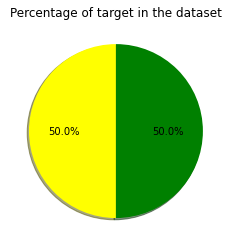

In [155]:
from matplotlib import pyplot as plt
sizes = y_over.value_counts(sort = True)
colors = ["yellow","green"] 
plt.pie(sizes, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90,)
plt.title('Percentage of target in the dataset')
plt.show()

# LogisticRegression with Balanc data

In [170]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression().fit(train_X,train_y)


y_pred=clf.predict(train_X)

print("-"*10,"Train Pred","-"*10)
print("Accuracy :" ,accuracy_score(train_y,y_pred))
print("Recall : ",recall_score(train_y,y_pred))
print("precsiion : ",precision_score(train_y,y_pred))
print("F1 score :",f1_score(train_y,y_pred))

#On test Set 
y_pred=clf.predict(test_X)
print("-"*10,"Test Pred","-"*10)
print("Accuracy :" ,accuracy_score(test_y,y_pred))
print("Recall : ",recall_score(test_y,y_pred))
print("precsiion : ",precision_score(test_y,y_pred))
print("F1 score :",f1_score(test_y,y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


---------- Train Pred ----------
Accuracy : 0.936859799338131
Recall :  0.936071616640337
precsiion :  0.9372561425709164
F1 score : 0.9366635051111813
---------- Test Pred ----------
Accuracy : 0.9375426800441246
Recall :  0.9359682970069871
precsiion :  0.9397905759162304
F1 score : 0.9378755420868384


# LogisticRegression with hyperparameters




In [171]:
from sklearn.linear_model import LogisticRegression
clf2 = LogisticRegression(n_jobs=2,intercept_scaling=10,C=10.0).fit(train_X,train_y)


y_pred=clf2.predict(train_X)

print("-"*10,"Train Pred","-"*10)
print("Accuracy :" ,accuracy_score(train_y,y_pred))
print("Recall : ",recall_score(train_y,y_pred))
print("precsiion : ",precision_score(train_y,y_pred))
print("F1 score :",f1_score(train_y,y_pred))

#On test Set 
y_pred=clf2.predict(test_X)
print("-"*10,"Test Pred","-"*10)
print("Accuracy :" ,accuracy_score(test_y,y_pred))
print("Recall : ",recall_score(test_y,y_pred))
print("precsiion : ",precision_score(test_y,y_pred))
print("F1 score :",f1_score(test_y,y_pred))

---------- Train Pred ----------
Accuracy : 0.9401516345362539
Recall :  0.942074776197999
precsiion :  0.9381883019263714
F1 score : 0.9401275224215246
---------- Test Pred ----------
Accuracy : 0.9403792614382518
Recall :  0.9423297528417979
precsiion :  0.9394884591391142
F1 score : 0.9409069610038008


# RandomForestClassifier

In [167]:
from sklearn.ensemble import RandomForestClassifier
models= RandomForestClassifier(max_depth=5,n_jobs=4)
models.fit(train_X,train_y)

RandomForestClassifier(max_depth=5, n_jobs=4)

In [168]:
y_pred=models.predict(train_X)

print("-"*10,"Train Pred","-"*10)
print("Accuracy :" ,accuracy_score(train_y,y_pred))
print("Recall : ",recall_score(train_y,y_pred))
print("precsiion : ",precision_score(train_y,y_pred))
print("F1 score :",f1_score(train_y,y_pred))

#On test Set 
y_pred=models.predict(test_X)
print("-"*10,"Test Pred","-"*10)
print("Accuracy :" ,accuracy_score(test_y,y_pred))
print("Recall : ",recall_score(test_y,y_pred))
print("precsiion : ",precision_score(test_y,y_pred))
print("F1 score :",f1_score(test_y,y_pred))

---------- Train Pred ----------
Accuracy : 0.9274920768328343
Recall :  0.9388801123398279
precsiion :  0.9176502882239912
F1 score : 0.9281438164812854
---------- Test Pred ----------
Accuracy : 0.9317119294006408
Recall :  0.9420168943581186
precsiion :  0.9239030377416385
F1 score : 0.9328720437880822


# All Classifier model 

In [172]:
models = {}

# Logistic Regression
from sklearn.linear_model import LogisticRegression
models['Logistic Regression'] = LogisticRegression()

# Support Vector Machines
from sklearn.svm import LinearSVC
models['Support Vector Machines'] = LinearSVC()

# Decision Trees
from sklearn.tree import DecisionTreeClassifier
models['Decision Trees'] = DecisionTreeClassifier()

# Random Forest
from sklearn.ensemble import RandomForestClassifier
models['Random Forest'] = RandomForestClassifier()

# Naive Bayes
from sklearn.naive_bayes import GaussianNB
models['Naive Bayes'] = GaussianNB()

# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
models['K-Nearest Neighbor'] = KNeighborsClassifier()

In [173]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

accuracy, precision, recall = {}, {}, {}

for key in models.keys():
    
    # Fit the classifier model
    models[key].fit(train_X, train_y)
    
    # Prediction 
    predictions = models[key].predict(test_X)
    
    # Calculate Accuracy, Precision and Recall Metrics
    accuracy[key] = accuracy_score(predictions, test_y)
    precision[key] = precision_score(predictions, test_y)
    recall[key] = recall_score(predictions, test_y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [174]:
df_model = pd.DataFrame(index=models.keys(), columns=['Accuracy', 'Precision', 'Recall'])
df_model['Accuracy'] = accuracy.values()
df_model['Precision'] = precision.values()
df_model['Recall'] = recall.values()

df_model

,Accuracy,Precision,Recall
Logistic Regression,0.937543,0.935968,0.939791
Support Vector Machines,0.836319,0.678486,0.994953
Decision Trees,0.990545,0.991031,0.990205
Random Forest,0.985870,0.993951,0.978341
Naive Bayes,0.626254,0.997184,0.574294
K-Nearest Neighbor,0.937858,0.972364,0.910369


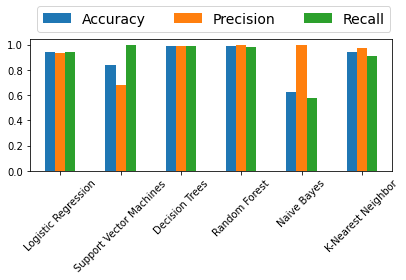

In [175]:
ax  = df_model.plot.bar(rot=45)
ax.legend(ncol= len(models.keys()), bbox_to_anchor=(0, 1), loc='lower left', prop={'size': 14})
plt.tight_layout()